In [1]:
#load zip and unzip file
#after load zip file
!unzip original_data.zip
!unzip test_data.zip

Archive:  original_data.zip
  inflating: original_data/1.jpg     
  inflating: original_data/10.jpg    
  inflating: original_data/2.jpg     
  inflating: original_data/3.jpg     
  inflating: original_data/4.jpg     
  inflating: original_data/5.jpg     
  inflating: original_data/6.jpg     
  inflating: original_data/7.jpg     
  inflating: original_data/8.jpg     
  inflating: original_data/9.jpg     
   creating: original_data/apple/
  inflating: original_data/apple/1.jpg  
  inflating: original_data/apple/10.jpg  
  inflating: original_data/apple/2.jpg  
  inflating: original_data/apple/3.jpg  
  inflating: original_data/apple/4.jpg  
  inflating: original_data/apple/5.jpg  
  inflating: original_data/apple/6.jpg  
  inflating: original_data/apple/7.jpg  
  inflating: original_data/apple/8.jpg  
  inflating: original_data/apple/9.jpg  
  inflating: original_data/others_1.jpg  
 extracting: original_data/others_10.jpg  
  inflating: original_data/others_11.jpg  
  inflating: origin

In [2]:
#create a directory
!rm -rf gen_data
!mkdir gen_data

In [ ]:
#任务：根据original_data样本建立模型，将test_data图像分类为普通/其他苹果。

#数据增强以增加常见苹果的样本量
#使用 VGG16 模型进行图像特征提取
#图像批量处理
#使用 Kmeans 模型尝试对常见苹果和其他苹果类型进行分类
#根据标记数据校正结果并将其可视化
#使用 Meanshift 来提升模型性能
#利用 PCA 进行降维以提高模型性能

In [3]:
#data Enhancement generation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
path = 'original_data'
dest_path = 'gen_data'
datagen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.02,horizontal_flip=True,vertical_flip=True)
gen = datagen.flow_from_directory(path,target_size=(224,224),batch_size=2,save_to_dir=dest_path,save_prefix='gen',save_format='jpg')
#genreation 100 images
for i in range(100):
  next(gen)


Found 10 images belonging to 1 classes.


In [49]:
#查看有多少图
import os

# 指定文件夹路径
folder_path = 'gen_data'  # 替换为您的图片文件夹路径

# 统计常见图片格式文件数量
image_count = 0
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']

for filename in os.listdir(folder_path):
    if any(filename.lower().endswith(ext) for ext in image_extensions):
        image_count += 1

print(f"文件夹中共有 {image_count} 张图片")

文件夹中共有 200 张图片


In [50]:
#
import os
import shutil

# 设置路径
original_data_path = 'original_data'
gen_data_path = 'gen_data'
train_dta_path = 'train_dta'

# 创建训练文件夹（如果不存在）
if not os.path.exists(train_dta_path):
    os.makedirs(train_dta_path)

# 1. 从original_data复制根目录中的图片（不包括apple子文件夹）
count_original = 0
for filename in os.listdir(original_data_path):
    file_path = os.path.join(original_data_path, filename)
    # 只复制文件，不复制文件夹，且只复制图片文件
    if os.path.isfile(file_path) and filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
        shutil.copy2(file_path, os.path.join(train_dta_path, filename))
        count_original += 1

# 2. 从gen_data复制所有增强图片
count_augmented = 0
for filename in os.listdir(gen_data_path):
    file_path = os.path.join(gen_data_path, filename)
    if os.path.isfile(file_path) and filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
        shutil.copy2(file_path, os.path.join(train_dta_path, filename))
        count_augmented += 1

print(f"合并完成！")
print(f"从原始数据文件夹复制了 {count_original} 张图片")
print(f"从增强数据文件夹复制了 {count_augmented} 张图片")
print(f"训练文件夹中总共有 {count_original + count_augmented} 张图片")

合并完成！
从原始数据文件夹复制了 30 张图片
从增强数据文件夹复制了 200 张图片
训练文件夹中总共有 230 张图片


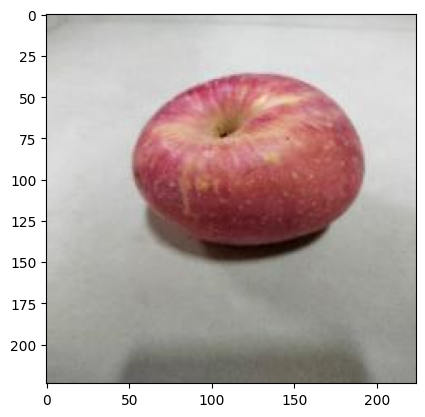

In [51]:
#visualize gen_data image
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array,load_img
image_path = 'gen_data/gen_0_1519025.jpg'
image = load_img(image_path)
plt.imshow(image)
plt.show()

In [52]:
#vgg16 extract features
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import numpy as np

model = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
X = np.expand_dims(img_to_array(image),axis=0)
X = preprocess_input(X)
features = model.predict(X)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [53]:
#size of features
print(features.shape)
#flatten
features = features.reshape(1,7*7*512)
print(features.shape)

(1, 7, 7, 512)
(1, 25088)


In [54]:
#put all directory and fig name into 1 array
import os

folder = 'train_dta'
img_paths = []
for filename in os.listdir(folder):
    if filename.endswith('.jpg'):
        img_paths.append(os.path.join(folder, filename))
print(img_paths)

['train_dta/gen_0_3320055.jpg', 'train_dta/gen_3_7243676.jpg', 'train_dta/gen_9_9799140.jpg', 'train_dta/gen_2_5142246.jpg', 'train_dta/gen_8_2004943.jpg', 'train_dta/gen_1_8865370.jpg', 'train_dta/gen_5_6168756.jpg', 'train_dta/gen_2_4631596.jpg', 'train_dta/gen_5_9479563.jpg', 'train_dta/gen_9_1977777.jpg', 'train_dta/others_8.jpg', 'train_dta/gen_1_3474290.jpg', 'train_dta/gen_8_6413773.jpg', 'train_dta/gen_5_8442243.jpg', 'train_dta/others_6.jpg', 'train_dta/gen_5_2454824.jpg', 'train_dta/6.jpg', 'train_dta/gen_2_1682393.jpg', 'train_dta/gen_3_3573057.jpg', 'train_dta/gen_0_3986997.jpg', 'train_dta/gen_3_9120377.jpg', 'train_dta/gen_4_6629375.jpg', 'train_dta/others_12.jpg', 'train_dta/gen_4_8551598.jpg', 'train_dta/gen_6_3490762.jpg', 'train_dta/gen_4_4563103.jpg', 'train_dta/gen_7_4255845.jpg', 'train_dta/1.jpg', 'train_dta/gen_7_8598398.jpg', 'train_dta/gen_7_4903679.jpg', 'train_dta/4.jpg', 'train_dta/gen_5_7922309.jpg', 'train_dta/gen_3_9347980.jpg', 'train_dta/gen_5_6409421.j

In [55]:
import os

# 指定文件夹路径
folder_path = 'train_dta'  # 替换为您的图片文件夹路径

# 统计常见图片格式文件数量
image_count = 0
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']

for filename in os.listdir(folder_path):
    if any(filename.lower().endswith(ext) for ext in image_extensions):
        image_count += 1

print(f"文件夹中共有 {image_count} 张图片")

文件夹中共有 230 张图片


In [56]:
#define a function to extract features
def modelProcess(img_paths, model):
    img = load_img(img_paths, target_size=(224, 224))  # 加载图像并调整大小为224x224
    img = img_to_array(img)  # 将图像转换为数组
    X = np.expand_dims(img, axis=0)  # 添加批次维度
    X = preprocess_input(X)  # 使用VGG16的预处理函数
    X_VGG = model.predict(X)  # 使用模型提取特征
    X_VGG = X_VGG.reshape(1, 7*7*512)  # 将特征展平为一维向量
    return X_VGG

In [59]:
# prompt: img_paths有多少文件

print(f"img_paths 中共有 {len(img_paths)} 个文件路径")

img_paths 中共有 230 个文件路径


In [18]:
#Batch processing of pictures
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import numpy as np

features_train = np.zeros([len(img_paths), 7*7*512])
for i in range(len(img_paths)):
    feature_i = modelProcess(img_paths[i], model)
    print('preprocessed:', img_paths[i])
    features_train[i] = feature_i

preprocessed: train_dta/gen_4_9242211.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
preprocessed: train_dta/others_17.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
preprocessed: train_dta/gen_5_2803527.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
preprocessed: train_dta/gen_3_1981734.jpg


In [60]:
print(len(img_paths))
print(features_train.shape)

230
(230, 25088)


In [61]:
#使用 Kmeans 模型尝试对常见苹果和其他苹果类型进行分类
x = features_train
print(x.shape)

(230, 25088)


In [68]:
#train kmeans model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, max_iter=2000)
kmeans.fit(x)

KMeans(max_iter=2000, n_clusters=2)

In [63]:
cluster_centers = kmeans.cluster_centers_
y_predict = kmeans.predict(x)
print(y_predict.shape)

(230,)


In [69]:
#find number of 1 and 0
from collections import Counter
print(Counter(y_predict))


Counter({np.int32(0): 125, np.int32(1): 105})


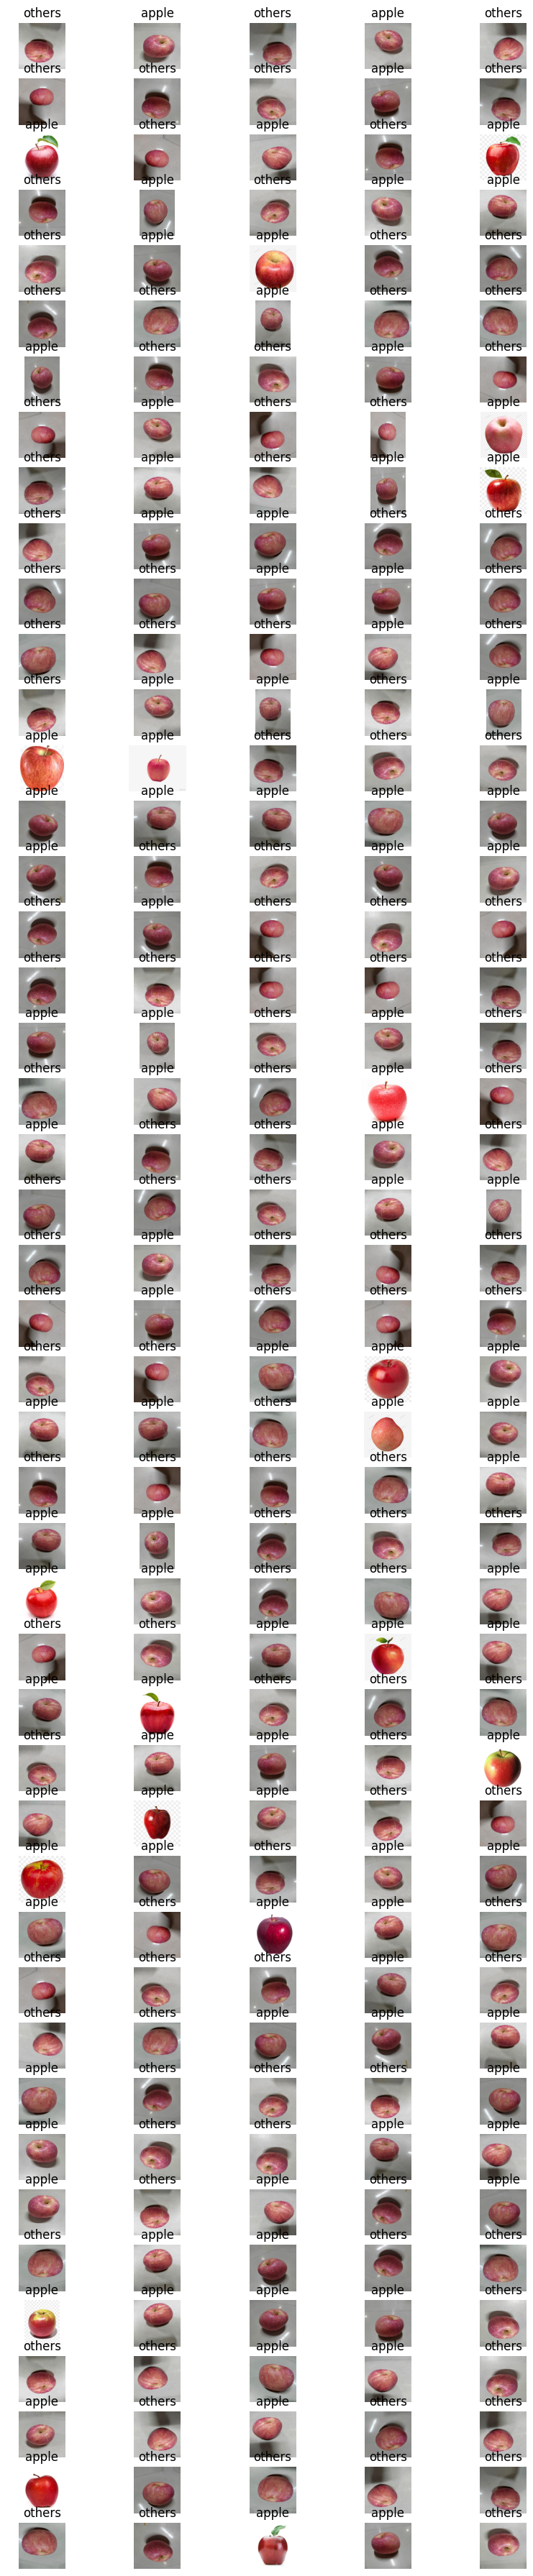

In [70]:
# 定义正常苹果的聚类ID
normal_apple_id = 1

# 可视化结果
# Adjust the number of rows to match the number of images with 5 columns per row
# We have 230 images and 5 columns, so we need 230 / 5 = 46 rows
fig2 = plt.figure(figsize=(10, 46)) # Adjusted figure size for 46 rows
# Loop through the indices of img_paths
for k in range(len(img_paths)):
    img = load_img(img_paths[k])  # 读取图像
    # Calculate subplot position based on the current index k
    plt.subplot(46, 5, k + 1) # Adjusted number of rows to 46
    plt.title('apple' if y_predict[k] == normal_apple_id else 'others')
    plt.imshow(img), plt.axis('off')

plt.show()

In [ ]:
#尝试用测试集测试

In [71]:
#数据集放入数组
import os

folder = 'test_data'
img_paths_test = []
for filename in os.listdir(folder):
    if filename.endswith('.jpg'):
        img_paths_test.append(os.path.join(folder, filename))
print(img_paths_test)

['test_data/6.jpg', 'test_data/1.jpg', 'test_data/4.jpg', 'test_data/others_14.jpg', 'test_data/5.jpg', 'test_data/others_9.jpg', 'test_data/2.jpg', 'test_data/others_4.jpg', 'test_data/3.jpg', 'test_data/others_1.jpg', 'test_data/others_18.jpg', 'test_data/others_15.jpg']


In [72]:
#测试集图片批量提取特征
features_test = np.zeros([len(img_paths_test), 7*7*512])
for i in range(len(img_paths_test)):
    feature_i = modelProcess(img_paths_test[i], model)
    print('preprocessed:', img_paths_test[i])
    features_test[i] = feature_i

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
preprocessed: test_data/6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
preprocessed: test_data/1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
preprocessed: test_data/4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step
preprocessed: test_data/others_14.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
preprocessed: test_data/5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
preprocessed: test_data/others_9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
preprocessed: test_data/2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
preprocessed: test_data/others_4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
preprocessed: test_data/3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
preprocessed: test_data/others_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
preprocessed: test_data/others_18.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
preprocessed: test_data/others_15.jpg


In [73]:
#确保提取成功
X_test = features_test
print(X_test.shape)

(12, 25088)


In [74]:
#用提取的数据预测
Y_test_predict = kmeans.predict(X_test)
print(Y_test_predict.shape)
from collections import Counter
print(Counter(Y_test_predict))

(12,)
Counter({np.int32(0): 7, np.int32(1): 5})


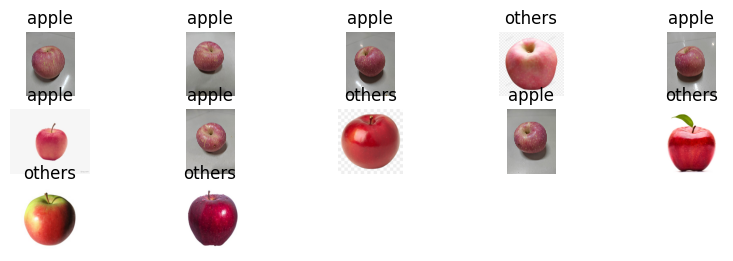

In [76]:
#可视化
normal_apple_id = 0

# 可视化结果
fig3 = plt.figure(figsize=(10, 40))
# Loop through the indices of img_paths_test
for k in range(len(img_paths_test)):
    img = load_img(img_paths_test[k])  # 读取图像
    # Calculate subplot position based on the current index k
    plt.subplot(40, 5, k + 1)
    plt.title('apple' if Y_test_predict[k] == normal_apple_id else 'others')
    plt.imshow(img), plt.axis('off')

plt.show()

In [32]:
#12个对了11个，准确率为90%
#准确率不高，尝试改进
#尝试用meanshift来训练

In [77]:
#features_train是vgg16提取后的训练集特征
#features_train = x
print(x.shape)

(230, 25088)


In [78]:
#换用Meanshift进行训练
from sklearn.cluster import MeanShift,estimate_bandwidth
#n_samples=140：表示每140个样本进行评估（可自行调节尝试）
#bw：区域大小
bw=estimate_bandwidth(x,n_samples=140)
print(bw)
#创建模型
cnn_ms=MeanShift(bandwidth=bw)
cnn_ms.fit(x)


1008.0597905062392


MeanShift(bandwidth=np.float64(1008.0597905062392))

In [79]:
y_predict_ms = cnn_ms.predict(x)
print(y_predict_ms)
print(Counter(y_predict_ms))

[ 0  0  0  0  0  0  0  0  0  0 13  0  0  0  1  0  0  0  0  0  0  0  6  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0 11  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  4  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0
  0  0  0  0  7  0  0 12  0  0  0  0  0  0  0 19  0  3  0  0  0  5  0  0
  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 14  0  0  0  0  0  0 17  0  0]
Counter({np.int64(0): 211, np.int64(13): 1, np.int64(1): 1, np.int64(6): 1, np.int64(9): 1, np.int64(11): 1, np.int64(10): 1, np.int64(18): 1, np.int64(4): 1, np.int64(8): 1, np.int64(15): 1, np.int64(7): 1, np.int64(12): 1, np.int64(19): 1, np.int64(3): 1, np.int64(5): 1, np.int64(16): 1, np.int64

In [ ]:
#聚类分布情况太差，无法判断。需要重新训练
#vgg16特征提取存在问题或者别的地方存在问题